<h1>EDA ON Haverman Survival Data</h1>

Haverman data set is the result of the research conducted between 1958 and 1970 to examine the patient will survived for less than 5 years or grater than equal to five years after operation. The study was held at the University of Chicago's Billings Hospital.

<h2> Objective</h2>

At this notebook, I want to predict the patient's chance of survival using the four features in this dataset.

<h3>reference</h3>

* My school's lecture meterial

<h2>1. Import Neccessary Libraries</h2>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,5)
np.random.seed(42)
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/haberman/haberman.csv


<h2>2. Load dataset</h2>

In [2]:
df = pd.read_csv("/kaggle/input/haberman/haberman.csv")
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<h2>3. EDA</h2>

In [3]:
df.shape

(306, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


* shape is (306, 4)
* 4 features are all int type
* There is no NaN

In [5]:
#change target feature as categorical type

df['status'] = df['status'].apply(lambda x: 'Survived' if x==1 else 'Died')
df.head(10)

,age,year,nodes,status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived
5,33,58,10,Survived
6,33,60,0,Survived
7,34,59,0,Died
8,34,66,9,Died
9,34,58,30,Survived


In [6]:
df.describe(include='all')

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,Survived
freq,NaN,NaN,NaN,225
mean,52.457516,62.852941,4.026144,NaN
std,10.803452,3.249405,7.189654,NaN
min,30.000000,58.000000,0.000000,NaN
25%,44.000000,60.000000,0.000000,NaN
50%,52.000000,63.000000,1.000000,NaN
75%,60.750000,65.750000,4.000000,NaN


In [7]:
df['status'].value_counts()

Survived    225
Died         81
Name: status, dtype: int64

Survived is 225 and Died is 81. 

It means the dataset is unbalanced.

<h2>3.1. Univariate Analysis</h2>

* 1-D Scatter plot
* PDF
* CDF
* Box Plot
* Violin Plot

<h2>3.2. Bivariate Analysis</h2>

* 2-D Scatter plot
* Pair Plot

<h2>3.3. Multivariate Analysis</h2>

* Countour Plot

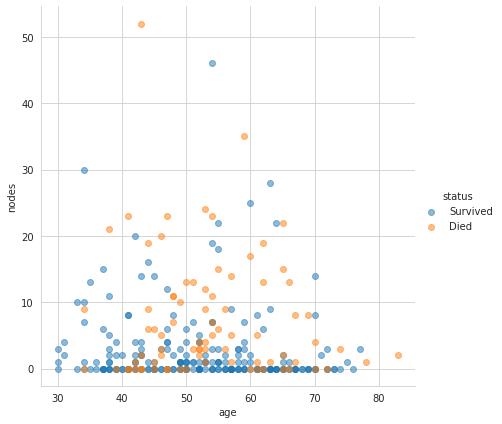

In [8]:
#1-D scatter Plot

sns.set_style('whitegrid')
g = sns.FacetGrid(df, hue='status', height=6)
g.map(plt.scatter, 'age', 'nodes', alpha=0.5)
g.add_legend()


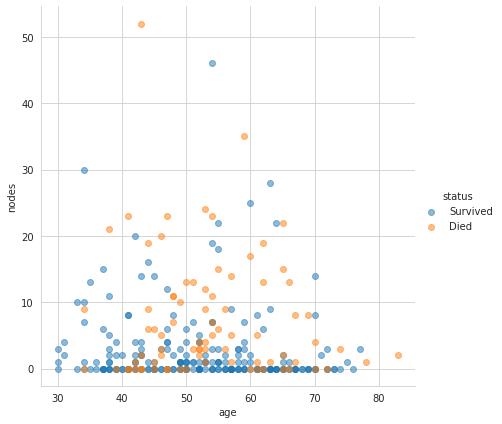

In [9]:
#1-D scatter Plot using different way

sns.set_style('whitegrid')
g = sns.FacetGrid(df, hue='status', height=6)\
.map(plt.scatter, 'age', 'nodes', alpha=0.5).add_legend()

<h3>graph observation</h3>

1. the range of the patients from 30 to 40 age has less of orange dot. That means this range of patients' survival rate is high.

2. Very few patients have more than 25 to 30 positive lymph nodes.

3. Almost all patients in their 50s and 60s survived if they don't have benign lymph nodes.

4. All patients over the age of 80 die within 5 years

5. Having many positive lymph nodes does not necessarily mean that you will die within 5 years.


<h3>Check observation 1.</h3>
the range of the patients from 30 to 40 age has less of orange dot. That means this range of patients' survival rate is high.



In [10]:
df_3040 = df.loc[(df['age']<=40)&(df['age']>=30)]
df_3040_survived = df_3040.loc[df_3040['status']=='Survived']
df_3040_died = df_3040.loc[df_3040['status']=='Died']

print(f'The number of patients in the age group 30 to 40 survived: {len(df_3040_survived)} \n The number of patients in the age group 30 to 40 survived: {len(df_3040_died)}')

The number of patients in the age group 30 to 40 survived: 39 
 The number of patients in the age group 30 to 40 survived: 4


 <h3>Check observation 2.</h3>

 Very few patients have more than 25 to 30 positive lymph nodes.

In [11]:
a = df['nodes'].value_counts()
a.sort_index(inplace=True)
print(f'The number of patients who has more than 25 lymph nodes of the 306 patients: {a[a.index>=25].sum()}')

The number of patients who has more than 25 lymph nodes of the 306 patients: 6


<h3>Check observation 3.</h3>

Almost all patients in their 50s and 60s survived if they don't have benign lymph nodes.


 <h3>Check observation 4.</h3>

All patients over the age of 80 die within 5 years


In [12]:
age = df['age']
count = 0
print(len(age))
for i in age:
    if(i>=80):
        count += 1
print(f'Number of patients whose age is more than 80: {count}')

306
Number of patients whose age is more than 80: 1


<h3>Check observation 5.</h3>


Having many positive lymph nodes does not necessarily mean that you will die within 5 years.

<h2>3.2. Bivariate Analysis</h2>

* 2-D Scatter plot
* Pair Plot


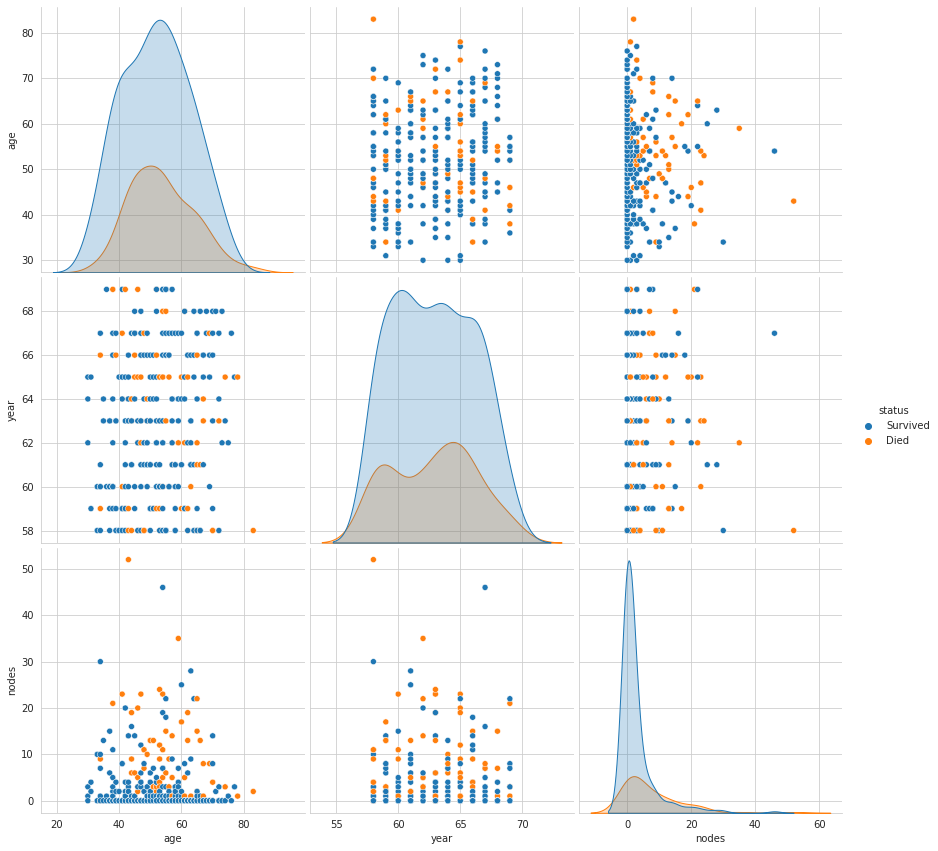

In [13]:
#pair plot
sns.set_style('whitegrid')
sns.pairplot(df, hue='status', height=4)

그래프 관찰
1. 선형적 관계를 보이는 그래프는 없다.
2. 데이터가 많이 중첩되어 있다.
3. 그림 2는 중첩이 심해 분류하기 어렵다. 61년과 68년에 환자들이 많이 생존하였다.
4. 그림3은 중첩이 심하지만 패턴이 있다. 양성림프절 수와 환자 나이가 target에 가장 유의미하게 보인다.
5. 그림6은 중첩이 가장 많아 분류 어렵다.
6. 그림4=2, 7=3, 8=6
7. 그림 3, 7이 데이터분석에 가장 유용

관찰3

In [14]:
# 61년 68년 죽은사람 산사람 수 비교하기

1-d scatter plot

In [15]:
#histogram으로 양성 림프절 수 확인

In [16]:
#확률분포 환자 나이에 대한 pdf


1. 데이터 중첩 심함
2. 3040 생존률 높음
3. 40~60 생존률 낮다
4. 40~45 사망자가 가장 많다
5. 환자 나이로는 생존가능성 판별 불가

In [17]:
#수술연도의 pdf

1.중첩 많음
2. 수술 잘된 해와 그렇지 않은 해가 구분되지만 연도로 추측은 불가
3. 수술 좋은해 65년, 60년
4. 수술 가장 안좋은 해 61년

In [18]:
#양성 림프절 수에 대한 pdf


1. 유방암 전문 웹사이트에 의하면 림프절 수는 생존율에 중요한 변수
2. 양성림프절 없으면 생존율 노ㅠ다.
3. 양성림프절 1개인 환자도 생존율 높다.
4. 양성림프절 수 많을수록 생존율 낮다
5. 매우 적은 환자들만 25개 이상의 림프절을 갖고 있다.
6. 양성 림프절 수는 데이터 분석에 적합한 속성이다.


In [19]:
#가설 확인


결론
양성림프절 개수별 생존율
0~1개
25개 이상

In [20]:
#양성림프절 cdf


In [21]:
#pdf cdf 같이 그리기

1. 양성림프절 많은 환자들도 생존하고 없는 환자가 수술 후 사망하기도 함
2. 생존환자중 가장 양성림프절이 많은 경우는 46개
3. 생존환자의 83.55%의 양성립프절 수는 0~4.6개
4. 사망한 환자의 56.79%의 양성림프절 수는 0~5.2개


In [22]:
#관찰에 대한 확인


boxplot, violin plot

생존자 측에 이상치가 많다.
생존자그룹의 q1, median이 거의 같다.
생존자 q3와 사망자 median 값이 같다>생존자와 사망자 데이터가 중첩되어 좋은 모델이 나올 것 같지 않다.
양성립프절 적은 환자들 대부분 생존


In [23]:
#countour plot

양성립프절이 2개 이하인 환자 전체에서 많은 수가 50~56세 그룹

eda 결론
1. 3040 많은 수 생존
2. 61, 68년 수술받은 환자들 많이 생존
3. 양성림프절은 유방암 중요지표
4. 양성림프절 없으면 생존확률 높음
5. 몇몇 환자는 많은 양성림프절을 갖고도 생존, 몇몇은 그 반대. 양성림프절 없는 것이 생존 보장하지 않음
6. 아주 일부의 환자들만 림프절 25개 이상
7. eda 바탕으로 유방암 환자의 생존 가능성에 대한 가설 제시 가